In [80]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd
import math

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
list1 = pd.read_csv('listings.csv')
# test_df = pd.read_csv('../input/test.csv')
# combine = [train_df, test_df]
newlist1= list1.drop(['host_name', 'last_review','host_id','calculated_host_listings_count'], axis=1)
newlist1.head()

,id,name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,availability_365
0,241032,Stylish Queen Anne Apartment,Queen Anne,West Queen Anne,47.636289,-122.371025,Entire home/apt,85,1,207,4.07,346
1,953595,Bright & Airy Queen Anne Apartment,Queen Anne,West Queen Anne,47.639123,-122.365666,Entire home/apt,150,2,43,1.48,291
2,3308979,New Modern House-Amazing water view,Queen Anne,West Queen Anne,47.629724,-122.369483,Entire home/apt,975,4,20,1.15,220
3,7421966,Queen Anne Chateau,Queen Anne,West Queen Anne,47.638473,-122.369279,Entire home/apt,100,1,0,NaN,143
4,278830,Charming craftsman 3 bdm house,Queen Anne,West Queen Anne,47.632918,-122.372471,Entire home/apt,450,1,38,0.89,365


In [5]:
list2 = pd.read_csv('/Users/Jialin/Google Drive/Cornell courses/ORIE 4741/Project/Seattle/listings2.csv')
# test_df = pd.read_csv('../input/test.csv')
# combine = [train_df, test_df]
list2.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


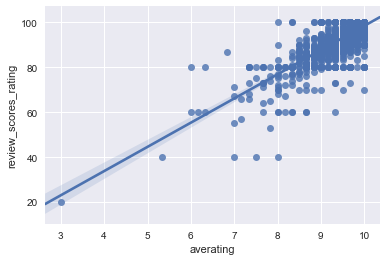

In [15]:
list2['averating'] = list2[["review_scores_checkin", "review_scores_accuracy","review_scores_communication", "review_scores_location","review_scores_value", "review_scores_cleanliness"]].mean(axis=1)
ax = sns.regplot(x="averating", y="review_scores_rating", data=list2)

<bound method DataFrame.tail of      host_response_rate  review_scores_rating
0                    96                  95.0
1                    98                  96.0
2                    67                  97.0
4                   100                  92.0
6                   100                  99.0
7                   100                  97.0
9                    98                  97.0
10                  100                  97.0
11                  100                  97.0
12                  100                  98.0
13                  100                 100.0
14                  100                  98.0
15                  100                  80.0
16                  100                  95.0
17                  100                  98.0
20                  100                 100.0
21                  100                  84.0
22                  100                 100.0
25                   67                 100.0
27                  100                  95.0
28

TypeError: No loop matching the specified signature and casting
was found for ufunc svd_n_s

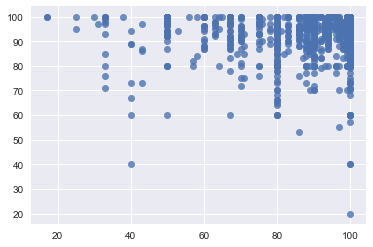

In [90]:
yy = pd.DataFrame()
yy['review_scores_rating'] = list2['review_scores_rating']
xx = pd.DataFrame()
xx['host_response_rate'] = list2['host_response_rate']
# print(math.isnan(xx['host_response_rate'][3]))
for i in xrange(xx.shape[0]):
    if isinstance(xx['host_response_rate'][i], basestring):
        xx['host_response_rate'][i] = 1.0*int(xx['host_response_rate'][i][:-1])
combine = pd.concat([xx,yy], axis=1)
combine = combine.dropna()

print(combine.tail)
ax = sns.regplot(x='host_response_rate', y="review_scores_rating", data=combine)# 

In [5]:
review1 = pd.read_csv('/Users/Jialin/Google Drive/Cornell courses/ORIE 4741/Project/Seattle/reviews.csv')
# test_df = pd.read_csv('../input/test.csv')
# combine = [train_df, test_df]
review1.head()

,listing_id,date
0,7202016,2015-07-19
1,7202016,2015-07-20
2,7202016,2015-07-26
3,7202016,2015-08-02
4,7202016,2015-08-10


In [6]:
review2 = pd.read_csv('/Users/Jialin/Google Drive/Cornell courses/ORIE 4741/Project/Seattle/reviews2.csv')
# test_df = pd.read_csv('../input/test.csv')
# combine = [train_df, test_df]
review2.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb..."
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...


In [7]:
calendar = pd.read_csv('/Users/Jialin/Google Drive/Cornell courses/ORIE 4741/Project/Seattle/calendar.csv')
# test_df = pd.read_csv('../input/test.csv')
# combine = [train_df, test_df]
print(calendar.shape)
calendar.head()

(1393570, 4)


,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [8]:
nbhd = pd.read_csv('/Users/Jialin/Google Drive/Cornell courses/ORIE 4741/Project/Seattle/neighbourhoods.csv')
# test_df = pd.read_csv('../input/test.csv')
# combine = [train_df, test_df]
nbhd.head()

,neighbourhood_group,neighbourhood
0,Ballard,Adams
1,Ballard,Loyal Heights
2,Ballard,Sunset Hill
3,Ballard,West Woodland
4,Ballard,Whittier Heights
